### Apply Data Storytelling

How do you create a data story? You’ve learned the basics, but the information is probably a bit abstract at this point. Keep in mind that storytelling is an art, so you have to get your imagination bubbling. In this project, you’ll learn some pointers to get those creative juices flowing. In the following sections, we’ll work step-by-step to create your first data story. 


__Steps:__

Ask the following questions and look for the answers using code and plots:

1. Can you count something interesting?
  
 <font color=blue>- Number of adults (over age 19) with heart-related conditions.
 - Of those with heart-related conditions:
    - Age
    - Age of onset of heart-related condition
    - Sex
    - Income
    - Ethnicity
    - Other health-related diagnoses and age of onset (diabetes, thyroid)
    - Depression score
    - Lab values
    - Anthropometric data (height, weight, % body fat)
    - Number of overnight hospital stays in the last year (if any)
    - Food security issues
    - Health insurance</font>
    
    
2. Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?

3. Can you make a bar plot or a histogram?

4. Can you compare two related quantities?

5. Can you make a scatterplot?

6. Can you make a time-series plot?

Looking at the plots, what are some insights you can make? 

Do you see any correlations? 

Is there a hypothesis you’d like to investigate further? 

What other questions do the insights lead you to ask?


Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? 

What are some other trends/relationships you think will make the story more complete?

Submission: Submit links to a GitHub repository containing a Jupyter Notebook. The Notebook should contain:
The questions you asked
The trends you investigated
The resulting visualizations and conclusions
You will be evaluated using this rubric.

These results will go into your final portfolio and presentation. Organize your work as you go along to make it easier to compile later. Create slides and/or a presentation (.ppt) about your emerging data story.   
 
In case the dataset is too large to commit to GitHub, please include a link to the dataset inside the Jupyter Notebook.

Discuss these results with your mentor at the next call. if you’re having trouble with your code for this unit, you can reach out to your course TA for help by emailing projects@springboard.com, or post questions in the community forum.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### We have identified 16 databases of interest from the 2015-2016 NHANES dataset: acculturation, body measurements, demographics, diabetes, depression, dexa (body composition), food security, hospitalization, health insurance, income,  medical conditions, and laboratory test results (fasting glucose, HDL, Triglycerides and LDL, Total Cholesterol, and Hemoglobin A1C). 


In [3]:
#reading our NHANES csv file into a pandas dataframe
nhanes=pd.read_csv('nhanes.csv')

In [81]:
nhanes

,Unnamed: 0,seqn,age,gender,ethnicity,lang_hisp,lang_nhb_nhw,lang_asian,bmi,diabetes,...,stroke,stroke_age,numhosp,glucose,hdl,tg,ldl,tchol,hgba1c,depr_score
0,0,83732.0,62.0,male,white,NaN,1.0,NaN,27.8,1.0,...,0.0,NaN,NaN,NaN,46.0,NaN,NaN,173.0,7.0,1.0
1,1,83733.0,53.0,male,white,NaN,NaN,NaN,30.8,0.0,...,0.0,NaN,NaN,101.0,63.0,147.0,173.0,265.0,5.5,2.0
2,2,83734.0,78.0,male,white,NaN,1.0,NaN,28.8,1.0,...,0.0,NaN,NaN,84.0,30.0,269.0,145.0,229.0,5.8,2.0
3,3,83735.0,56.0,female,white,NaN,1.0,NaN,42.4,0.0,...,0.0,NaN,NaN,NaN,61.0,NaN,NaN,174.0,5.6,13.0
4,4,83736.0,42.0,female,black,NaN,1.0,NaN,20.3,0.0,...,0.0,NaN,NaN,84.0,53.0,47.0,142.0,204.0,5.6,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,9966,92581.0,1.0,female,white,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9967,9967,92963.0,0.0,female,mexican,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9968,9968,93225.0,1.0,female,black,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9969,9969,93362.0,1.0,female,white,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(nhanes.shape)
print(nhanes.info())
print(nhanes.head(), nhanes.tail())




(9971, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 41 columns):
Unnamed: 0         9971 non-null int64
seqn               9971 non-null float64
age                9971 non-null float64
gender             9971 non-null object
ethnicity          9971 non-null object
lang_hisp          2880 non-null object
lang_nhb_nhw       4964 non-null float64
lang_asian         981 non-null object
bmi                8756 non-null float64
diabetes           9571 non-null float64
diabetes_age       841 non-null float64
prediabetes        6034 non-null float64
depr1              5151 non-null float64
depr2              5161 non-null float64
depr3              5161 non-null float64
depr4              5161 non-null float64
depr5              5158 non-null float64
depr6              5159 non-null float64
depr7              5159 non-null float64
depr8              5158 non-null float64
depr9              5157 non-null float64
depr10             3577 non-n

In [5]:
#depr_score = [row.depr1, row.depr2, row.depr3, row.depr4, row.depr5, row.depr6,row.depr7, row.depr8, row.depr9, row.depr10 for index, row in nhanes.iterrows()]
#nhanes['depr_score']= depr_score

nhanes['depr_score'] = nhanes.apply(lambda row: row.depr1+row.depr2+row.depr3+row.depr4+row.depr5+row.depr6+row.depr7+row.depr8+row.depr9+row.depr10, axis=1 )

In [6]:
print(nhanes[['depr1','depr2','depr3','depr4','depr5','depr6','depr7','depr8','depr9','depr10', 'depr_score']].head(300))
print(nhanes[['depr1','depr2','depr3','depr4','depr5','depr6','depr7','depr8','depr9','depr10', 'depr_score']].tail(300))


     depr1  depr2  depr3  depr4  depr5  depr6  depr7  depr8  depr9  depr10  \
0      0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0   
1      1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0     0.0   
2      0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0     1.0   
3      1.0    1.0    2.0    2.0    1.0    3.0    2.0    0.0    1.0     0.0   
4      1.0    1.0    1.0    1.0    3.0    0.0    1.0    0.0    0.0     0.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
295    0.0    1.0    3.0    3.0    0.0    1.0    0.0    1.0    0.0     0.0   
296    0.0    0.0    0.0    1.0    0.0    0.0    0.0    1.0    0.0     0.0   
297    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
298    0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    0.0     0.0   
299    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   

     depr_score  
0           1.0  
1           2.0  
2        

### The following are some visualizations of the data of interest.

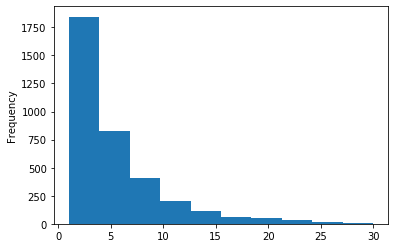

In [7]:
nhanes.depr_score.plot(kind='hist')

In [86]:
nhanes['cvd_age_onset'] = []
if (nhanes['chf_age'==True] or nhanes['chd_age'==True] or nhanes['angina_age'==True] or nhanes['heartattack_age'==True] \
     or nhanes['stroke_age']==True):
            cvd_age_onset = nhanes[['chf_age','chd_age','angina_age','heartattack_age','stroke_age']].min()
            nhanes['cvd_age_onset'].append(cvd_age_onset)
else:
    nhanes['cvd_age_onset'].append('NaN')

ValueError: Length of values does not match length of index

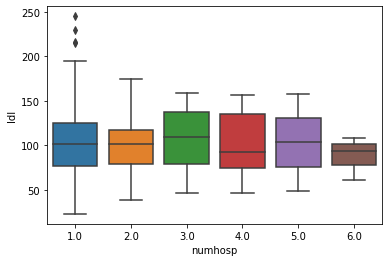

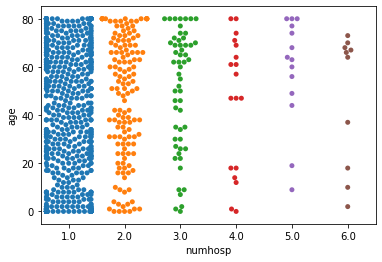

In [32]:
sns.boxplot(data = nhanes, x='numhosp', y='ldl')
plt.show()
sns.swarmplot(data=nhanes, x='numhosp', y='age')
plt.show()

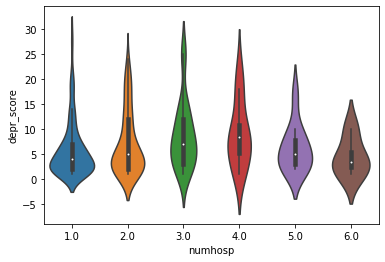

In [47]:
sns.violinplot(data=nhanes, x='numhosp',y='depr_score')

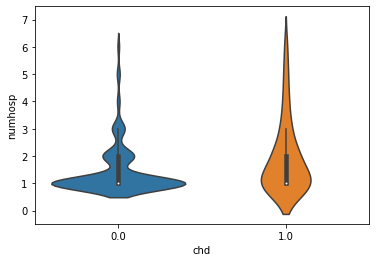

In [78]:
sns.violinplot(data=nhanes, x='chd',y='numhosp')

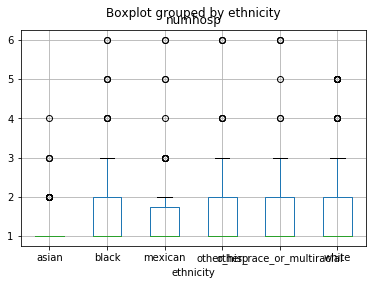

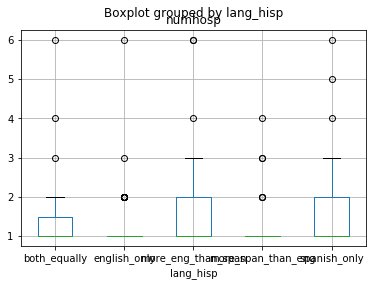

In [22]:
#number of hospital stays by ethnicity
nhanes.boxplot(column='numhosp', by='ethnicity')
plt.show()
nhanes.boxplot(column='numhosp', by='lang_hisp')

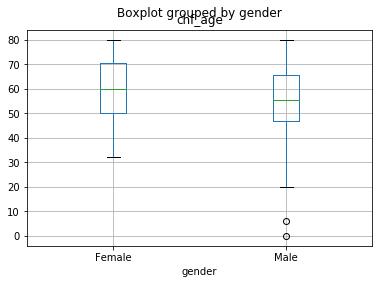

In [31]:
#Looking at Age of onset of CHF by gender
nhanes.boxplot(column='chf_age', by='gender')
plt.show()

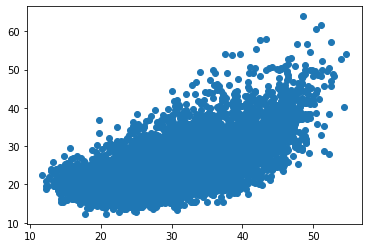

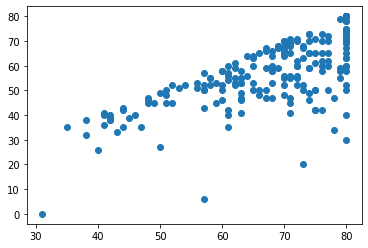

In [28]:
#Comparing bodyfatpct to BMI
plt.scatter(nhanes.bodyfatpct, nhanes.bmi)
plt.show()
plt.scatter(nhanes.age, nhanes.chf_age)

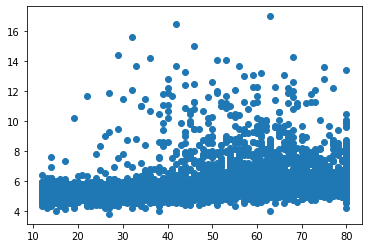

In [94]:
plt.scatter(nhanes.age, nhanes.hgba1c)

In [33]:
# Looking at NHANES data only for participants over age of 19 years.
over19 = nhanes.loc[nhanes['age'] >19]
print(over19)

         seqn   age  gender  ethnicity  lang_hisp  lang_nhb_nhw  lang_asian  \
0     83732.0  62.0    Male        3.0        NaN           1.0         NaN   
1     83733.0  53.0    Male        3.0        NaN           NaN         NaN   
2     83734.0  78.0    Male        3.0        NaN           1.0         NaN   
3     83735.0  56.0  Female        3.0        NaN           1.0         NaN   
4     83736.0  42.0  Female        4.0        NaN           1.0         NaN   
...       ...   ...     ...        ...        ...           ...         ...   
8984  93695.0  76.0  Female        3.0        NaN           1.0         NaN   
8985  93696.0  26.0    Male        3.0        NaN           1.0         NaN   
8986  93697.0  80.0  Female        3.0        NaN           1.0         NaN   
8988  93700.0  35.0    Male        3.0        NaN           NaN         NaN   
8990  93702.0  24.0  Female        3.0        NaN           1.0         NaN   

       bmi  diabetic  age_diabetic  prediabetic  de